This is where i'll be coding a CNN network for facial detection/recognition.

In [1]:
import cv2
import os 
import skimage
import selectivesearch
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from PIL import Image, ImageDraw

from sklearn.utils import shuffle

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score

from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

from skimage.io import imread, imsave, imshow
from skimage import data, color, io, filters, morphology,transform, exposure, feature, util

###### Voor Tensorflow-GPU ########
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [2]:
image_size = 100

nr_train_images = 2250
nr_test_images = 2250
nr_text_images = 2250

face_train_images = []
face_test_images = []

random_train_images = []
random_test_images = []

text_train_images = []
text_test_images = []

y_face_train = []
y_face_test = []

y_random_train = []
y_random_test = []

y_text_train = []
y_text_test = []

path = r'../../Data/manga109_faces'
valid_images = [".jpg",".gif",".png"]
folders = os.listdir(path)

i = 0
while len(face_train_images) < nr_train_images:
    manga_path = path + f"/{folders[i]}"
    i += 1
    for f in os.listdir(manga_path):
        ext = os.path.splitext(f)[1]
        if ext.lower() not in valid_images:
            continue
        im = imread(os.path.join(manga_path,f))
        im = transform.resize(im,(image_size,image_size),mode='constant',anti_aliasing=True)
        face_train_images.append(im)
        y_face_train.append(1)


folders = os.listdir(path)

i = 0
while len(face_test_images) < nr_test_images:
    manga_path = path + f"/{folders[i]}"
    i += 1
    for f in os.listdir(manga_path):
        ext = os.path.splitext(f)[1]
        if ext.lower() not in valid_images:
            continue
        im = imread(os.path.join(manga_path,f))
        im = transform.resize(im,(image_size,image_size),mode='constant',anti_aliasing=True)
        face_test_images.append(im)
        y_face_test.append(1)

path = r'../../Data/manga109_random_frames'
valid_images = [".jpg",".gif",".png"]
folders = os.listdir(path)

i = 0
while len(random_train_images) < nr_train_images:
    manga_path = path + f"/{folders[i]}"
    i += 1
    for f in os.listdir(manga_path):
        ext = os.path.splitext(f)[1]
        if ext.lower() not in valid_images:
            continue
        im = imread(os.path.join(manga_path,f))
        im = transform.resize(im,(image_size,image_size),mode='constant',anti_aliasing=True)
        random_train_images.append(im)
        y_random_train.append(0)

folders = os.listdir(path)

i = 0
while len(random_test_images) < nr_test_images:
    manga_path = path + f"/{folders[i]}"
    i += 1
    for f in os.listdir(manga_path):
        ext = os.path.splitext(f)[1]
        if ext.lower() not in valid_images:
            continue
        im = imread(os.path.join(manga_path,f))
        im = transform.resize(im,(image_size,image_size),mode='constant',anti_aliasing=True)
        random_test_images.append(im)
        y_random_test.append(0)


path = r'../../Data/manga109_text'
valid_images = [".jpg",".gif",".png"]
folders = os.listdir(path)

i = 0
while len(text_train_images) < nr_text_images:
    manga_path = path + f"/{folders[i]}"
    i += 1
    for f in os.listdir(manga_path):
        ext = os.path.splitext(f)[1]
        if ext.lower() not in valid_images:
            continue
        im = imread(os.path.join(manga_path,f))
        im = transform.resize(im,(image_size,image_size),mode='constant',anti_aliasing=True)
        text_train_images.append(im)
        y_text_train.append(2)

folders = os.listdir(path)

i = 0
while len(text_test_images) < nr_text_images:
    manga_path = path + f"/{folders[i]}"
    i += 1
    for f in os.listdir(manga_path):
        ext = os.path.splitext(f)[1]
        if ext.lower() not in valid_images:
            continue
        im = imread(os.path.join(manga_path,f))
        im = transform.resize(im,(image_size,image_size),mode='constant',anti_aliasing=True)
        text_test_images.append(im)
        y_text_test.append(2)



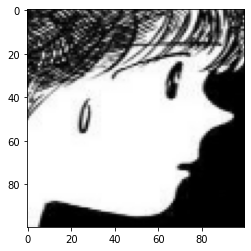

In [3]:
plt.imshow(face_train_images[1])
plt.show()

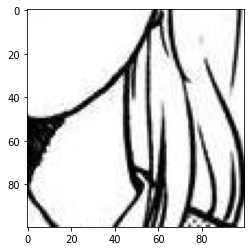

In [4]:
plt.imshow(random_train_images[1])
plt.show()


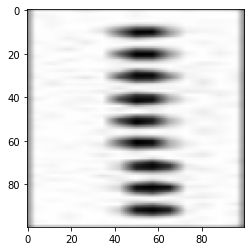

In [5]:
plt.imshow(text_train_images[1])
plt.show()

In [6]:
X_train, y_train = shuffle(np.asarray(face_train_images + random_train_images + text_train_images), np.asarray(y_face_train + y_random_train + y_text_train))
X_test, y_test = shuffle(np.asarray(face_test_images + random_test_images + text_test_images), np.asarray(y_face_test + y_random_test + y_text_test))

y_train_hot = to_categorical(y_train)

In [7]:
# Early stopping
padding = 'same'
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 20)



#-----------------------------------------------
#-----------------------------------------------
batch_size = 10 # 
epochs = 100 # 
#-----------------------------------------------
#-----------------------------------------------
num_classes = 3
img_rows, img_cols = 100, 100
input_shape = (img_rows, img_cols,3)
adam = tf.keras.optimizers.Adam(lr=0.0001)
# Model
model = Sequential()
#-----------------------------------------------
#-----------------------------------------------
model.add(Conv2D(30, kernel_size=(3, 3), activation='relu',input_shape=input_shape, padding=padding)) 
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.2)) # Value between 0 and 1 
#-----------------------------------------------
#-----------------------------------------------
model.add(Conv2D(30, (3, 3), activation='relu', padding=padding)) 
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.2)) # Value between 0 and 1 
#-----------------------------------------------
#-----------------------------------------------
model.add(Conv2D(30, (3, 3), activation='relu', padding=padding)) 
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.2)) # Value between 0 and 1 
#-----------------------------------------------
#-----------------------------------------------
model.add(Conv2D(30, (3, 3), activation='relu', padding=padding)) 
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.2)) # Value between 0 and 1 
#-----------------------------------------------
#-----------------------------------------------
model.add(Flatten()) 
model.add(Dense(num_classes, activation='softmax'))
#-----------------------------------------------

model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

# Trainen van het CNN
history = model.fit(X_train, y_train_hot, batch_size=batch_size, epochs=epochs, validation_split=0.3, verbose=1, callbacks=[es])

Epoch 1/100
575/575 [==============================] - 9s 16ms/step - loss: 1.0881 - accuracy: 0.3933 - val_loss: 1.0622 - val_accuracy: 0.5757
Epoch 2/100
575/575 [==============================] - 8s 13ms/step - loss: 0.9440 - accuracy: 0.5588 - val_loss: 0.8065 - val_accuracy: 0.7288
Epoch 3/100
575/575 [==============================] - 7s 13ms/step - loss: 0.6590 - accuracy: 0.7347 - val_loss: 0.5892 - val_accuracy: 0.7698
Epoch 4/100
575/575 [==============================] - 8s 14ms/step - loss: 0.4678 - accuracy: 0.8285 - val_loss: 0.4551 - val_accuracy: 0.8490
Epoch 5/100
575/575 [==============================] - 8s 14ms/step - loss: 0.3731 - accuracy: 0.8653 - val_loss: 0.4070 - val_accuracy: 0.8668
Epoch 6/100
575/575 [==============================] - 7s 13ms/step - loss: 0.3270 - accuracy: 0.8879 - val_loss: 0.4556 - val_accuracy: 0.8429
Epoch 7/100
575/575 [==============================] - 7s 12ms/step - loss: 0.2919 - accuracy: 0.8943 - val_loss: 0.2702 - val_accuracy:

In [8]:
model.summary()
model.save('cnn_model.h5')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 30)      840       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 30)        0         
_________________________________________________________________
dropout (Dropout)            (None, 50, 50, 30)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 30)        8130      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 30)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 25, 25, 30)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 30)        8

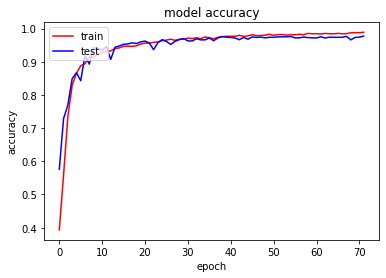

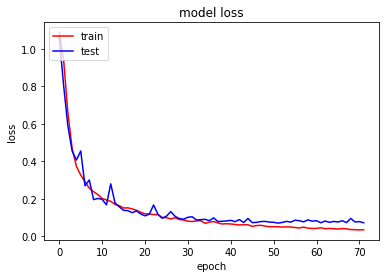

In [9]:
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'b')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# Loss 
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [11]:
y_pred = model.predict_classes(X_test)
print('\n')
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)

print(cf)
print(accuracy_score(y_test, y_pred) * 100) 

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2305
           1       0.98      0.99      0.99      3088
           2       1.00      0.99      0.99      2814

    accuracy                           0.99      8207
   macro avg       0.99      0.99      0.99      8207
weighted avg       0.99      0.99      0.99      8207

[[2280   20    5]
 [  16 3070    2]
 [   7   27 2780]]
99.06177653222858


Model predicts this image to be: 1
While image is actually a: 0


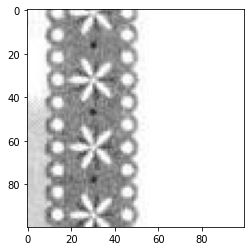

In [12]:
# Missclassified images
import numpy as np
import scipy.misc as smp
from PIL import Image
import matplotlib.pyplot as plt
n=200
for i in range(n):
    image = []
    if y_pred[i] != y_test[i]:
        #plt.figure(figsize=(20, 4))
        #ax = plt.subplot(2, n, i + 1)
        print("Model predicts this image to be: " + str(y_pred[i]))
        print("While image is actually a: " + str(y_test[i]))
        plt.imshow(X_test[i])
        #ax.get_xaxis().set_visible(False)
        #ax.get_yaxis().set_visible(False)
        plt.show()

In [13]:
# Should Test this with same data that i used for the xml test

def sliding_windows(image):
    if not os.path.exists(f"Results/Selective_search/{str(volume_name)}"):
        os.makedirs(f"Results/Selective_search/{str(volume_name)}")
    image_height = image.size[1]
    image_width = image.size[0]
    window_size = 75
    window_step = 50
    for y in range(0, image_height - 50, window_step):
        for x in range(0, image_width - 50, window_step):
            #  window = image[y:y+window_size, x:x+window_size]
            window = image.crop((x, y, x+window_size, y+window_size))
            img = transform.resize(np.asarray(window),(1,100,100,3))
            prediction = model.predict(img)
            # print(prediction[0])
            if prediction[0][1] > 0.7:
                draw = ImageDraw.Draw(image)
                draw.rectangle([x, y, x+window_size, y+window_size], outline="#D32C2C", width=4)
    image.save("result.jpg")
           
img = Image.open("1.jpg")
sliding_windows(img)

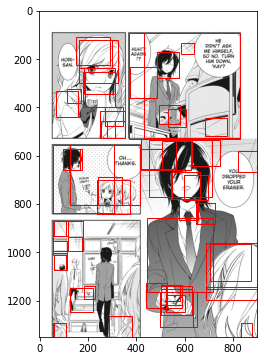

In [14]:
import skimage.data
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import selectivesearch


img = imread("1.jpg")
image_to_crop = Image.open("1.jpg")
# perform selective search
img_lbl, regions = selectivesearch.selective_search(img, scale=325, sigma=0.9, min_size=20)

candidates = set()
for r in regions:
    # excluding same rectangle (with different segments)
    if r['rect'] in candidates:
       continue
    # excluding regions smaller than 2000 pixels
    if r['size'] < 1000:
        continue

    if r['size'] > 8000:
        continue
    # distorted rects
    x, y, w, h = r['rect']
    if w / h > 1.2 or h / w > 1.2:
        continue
    candidates.add(r['rect'])

# draw rectangles on the original image
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6, 6))
ax.imshow(img)
for x, y, w, h in candidates:
    # print(x, y, w, h)
    rect = mpatches.Rectangle((x, y), w, h, fill=False, edgecolor='red', linewidth=1)
    ax.add_patch(rect)
    img2 = image_to_crop.crop((x, y, x+w, y+h))
    # img2.save(f'{i}.png')
    img2 = transform.resize(np.asarray(img2),(1,100,100,3))
    prediction = model.predict(img2)
    if prediction[0][1] > 0.5:
        draw = ImageDraw.Draw(image_to_crop)
        draw.rectangle([x, y, x+w, y+h], outline="#D32C2C", width=4)
image_to_crop.save("result2.jpg")

In [31]:
def sliding_windows(files, directory, volume_name):
    for file in files:
        if not os.path.exists(f"Results/Sliding_window/{str(volume_name)}"):
            os.makedirs(f"Results/Sliding_window/{str(volume_name)}")

        image = Image.open(directory + "/" + file)
        image_height = image.size[1]
        image_width = image.size[0]
        window_size = 75
        window_step = 50
        for y in range(0, image_height - 50, window_step):
            for x in range(0, image_width - 50, window_step):
                #  window = image[y:y+window_size, x:x+window_size]
                window = image.crop((x, y, x+window_size, y+window_size))
                img = transform.resize(np.asarray(window),(1,100,100,3))
                prediction = model.predict(img)
                # print(prediction[0])
                if prediction[0][1] > 0.7:
                    draw = ImageDraw.Draw(image)
                    draw.rectangle([x, y, x+window_size, y+window_size], outline="#D32C2C", width=4)
        image.save(f"Results/Sliding_window/{str(volume_name)}/{file}")
           
#img = Image.open("1.jpg")
#sliding_windows(img)

In [17]:
from PIL import Image, ImageFont, ImageDraw  
import skimage.data
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import selectivesearch
import math
from keras.models import load_model 

def detect_cnn(files, directory, volume_name):
    model = load_model('cnn_model.h5')
    for file in files:
        if not os.path.exists(f"Results/Selective_search/{str(volume_name)}"):
            os.makedirs(f"Results/Selective_search/{str(volume_name)}")

        img = imread(directory + "/" +  file)
        image_to_crop = Image.open(directory + "/" + file)

        # perform selective search
        img_lbl, regions = selectivesearch.selective_search(img, scale=325, sigma=0.9, min_size=20)

        candidates = set()
        for r in regions:
            # excluding same rectangle (with different segments)
            if r['rect'] in candidates:
                continue
            # excluding regions smaller than 2000 pixels
            if r['size'] < 2000:
                continue

            if r['size'] > 8000:
                continue

            # distorted rects
            x, y, w, h = r['rect']
            if w / h > 1.2 or h / w > 1.2:
                continue
            candidates.add(r['rect'])


        # draw rectangles on the original image
        fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6, 6))
        ax.imshow(img)
        for x, y, w, h in candidates:
            rect = mpatches.Rectangle((x, y), w, h, fill=False, edgecolor='red', linewidth=1)
            ax.add_patch(rect)
            img2 = image_to_crop.crop((x, y, x+w, y+h))
            # img2.save(f'{i}.png')
            img2 = transform.resize(np.asarray(img2),(1,100,100,3))
            prediction = model.predict(img2)
            if prediction[0][1] > 0.60:
                draw = ImageDraw.Draw(image_to_crop)
                draw.rectangle([x, y, x+w, y+h], outline="#D32C2C", width=4)
                draw.text([x+10, y+10], str(round(prediction[0][1] * 100)) + "%", font=ImageFont.truetype("arial", 40), fill='black')
        image_to_crop.save(f"Results/Selective_search/{str(volume_name)}/{file}")
        print(f"Done with {file}")
        plt.show()

In [20]:
directory = r'D:\RESEARCH PROJECT\Data\Volumes'
files = os.listdir(directory)

print("Which volume of manga would you like to use detection on?")
for i in range(0, len(files)):
    print(f" \t {i}. {files[i]}")
chosen_volume = input()
chosen_directory = directory + "\\" + str(files[int(chosen_volume)])

detect_cnn(os.listdir(chosen_directory), chosen_directory,  chosen_directory.partition("Volumes\\")[2])
sliding_window(os.listdir(chosen_directory), chosen_directory, chosen_directory.partition("Volumes\\")[2])

Which volume of manga would you like to use detection on?
 	 0. Horimiya v01 (2015) (Digital) (LuCaZ).cbz.zip
 	 1. One Piece 01.cbz.zip
 	 2. Your Lie in April v01 (2015) (Digital) (danke-Empire).cbz.zip


KeyboardInterrupt: 